In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_TEST =1000000;

N = 7
K = 4

Esdb = np.arange(9)
N0  = 1 / np.power(10,Esdb/10)
awgn_std = np.sqrt(N0)


x_test = np.random.randint(0,2,(K,N_TEST))
x_test

array([[1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [3]:
code_bit1=np.logical_xor(x_test[0,:],np.logical_xor(x_test[1,:],x_test[2,:]))
code_bit2=np.logical_xor(x_test[0,:],np.logical_xor(x_test[2,:],x_test[3,:]))
code_bit4=np.logical_xor(x_test[0,:],np.logical_xor(x_test[1,:],x_test[3,:]))

code_bit1=code_bit1.astype(np.int32)
code_bit2=code_bit2.astype(np.int32)
code_bit4=code_bit4.astype(np.int32)


transmit_code = np.array([code_bit1,code_bit2,x_test[0,:],code_bit4,x_test[1,:],x_test[2,:],x_test[3,:]])
transmit_code[transmit_code==0] = -1

In [4]:
G = np.array([[1,1,0,1], 
              [1,0,1,1],
              [1,0,0,0],
              [0,1,1,1],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])

H = np.array([1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1]).reshape((3,7))

R = np.array([[0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0],
              [0,0,0,0,0,0,1]])

valid_pattern = np.array( [[0,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0],
                           [0,0,1,1],
                           [0,1,0,0],
                           [0,1,0,1],
                           [0,1,1,0],
                           [0,1,1,1],
                           [1,0,0,0],
                           [1,0,0,1],
                           [1,0,1,0],
                           [1,0,1,1],
                           [1,1,0,0],
                           [1,1,0,1],
                           [1,1,1,0],
                           [1,1,1,1]]).T

In [5]:
valid_code = np.dot(G,valid_pattern) % 2
valid_code[valid_code==0] = -1
euclidean = np.zeros((valid_code.shape[1],N_TEST))
decoded_bit=np.zeros((N,N_TEST));  

In [6]:
transmit_code = np.dot(G,x_test)
transmit_code = np.mod(transmit_code,2)
transmit_code[transmit_code==0]=-1;

In [7]:
l_BLER_hard = list()
l_BLER_soft = list()

l_BER_hard = list()
l_BER_soft = list()


for i in range(awgn_std.shape[0]):
    
    noisy_code = (transmit_code)+np.random.normal(0,awgn_std[i],(7,N_TEST))
    receive_code = np.array(noisy_code)
    receive_code[receive_code>=0] = 1
    receive_code[receive_code<0]  = 0

#hard_decision
# error detected block
    
    z = np.mod(np.dot(H,receive_code),2)
    edb = z[0,:] + 2*z[1,:] + 4*z[2,:]
    edb = edb.astype(int)
    
    correction_code = np.array(receive_code)
    correction_code[edb[edb!=0]-1,edb!=0] = (correction_code[edb[edb!=0]-1,edb!=0] + 1) % 2
    
    receive_x_test = np.dot(R,correction_code)
    err_blk = np.sum( (receive_x_test != x_test ), axis = 0 ) 
    err_bit = np.sum( (receive_x_test != x_test) )
    bler = err_blk[err_blk !=0 ].shape[0] / N_TEST
    ber  = err_bit / x_test.size
    l_BLER_hard.append(bler)
    l_BER_hard.append(ber)
    print('Hard_decision: Es/No = ' + str(Esdb[i]) +'  ;   BLER =' + str(bler))
    print('Hard_decision: Es/No = ' + str(Esdb[i]) +'  ;   BER =' + str(ber))
                     
                     
                     
                     
    for k in range(valid_code.shape[1]):
        euclidean[k] = np.sum(( (np.array(noisy_code) - valid_code[:,k].reshape((7,1)))**2 ),axis=0)
    soft_code = valid_code[:,np.argmin(euclidean,axis = 0)]
    soft_code[soft_code==-1] = 0
    receive_x_test = np.dot(R,soft_code)

    err_blk = np.sum( (receive_x_test != x_test) , axis = 0 )
    err_bit = np.sum( (receive_x_test != x_test) )
    bler = err_blk[err_blk !=0 ].shape[0] / N_TEST
    ber  = err_bit / x_test.size
    l_BLER_soft.append(bler)
    l_BER_soft.append(ber)

    print('soft_decision: Es/No = ' + str(Esdb[i]) +'  ;   BLER =' + str(bler))
    print('soft_decision: Es/No = ' + str(Esdb[i]) +'  ;   BER =' + str(ber))      


                     
                     



Hard_decision: Es/No = 0  ;   BLER =0.307433
Hard_decision: Es/No = 0  ;   BER =0.1403525
soft_decision: Es/No = 0  ;   BLER =0.222309
soft_decision: Es/No = 0  ;   BER =0.102671
Hard_decision: Es/No = 1  ;   BLER =0.231027
Hard_decision: Es/No = 1  ;   BER =0.10433275
soft_decision: Es/No = 1  ;   BLER =0.150796
soft_decision: Es/No = 1  ;   BER =0.06915425
Hard_decision: Es/No = 2  ;   BLER =0.159398
Hard_decision: Es/No = 2  ;   BER =0.07125775
soft_decision: Es/No = 2  ;   BLER =0.090885
soft_decision: Es/No = 2  ;   BER =0.041374
Hard_decision: Es/No = 3  ;   BLER =0.099951
Hard_decision: Es/No = 3  ;   BER =0.04427425
soft_decision: Es/No = 3  ;   BLER =0.047806
soft_decision: Es/No = 3  ;   BER =0.021602
Hard_decision: Es/No = 4  ;   BLER =0.055483
Hard_decision: Es/No = 4  ;   BER =0.0242685
soft_decision: Es/No = 4  ;   BLER =0.020866
soft_decision: Es/No = 4  ;   BER =0.0093135
Hard_decision: Es/No = 5  ;   BLER =0.026199
Hard_decision: Es/No = 5  ;   BER =0.01142725
soft_dec

c:\users\eason\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
c:\users\eason\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


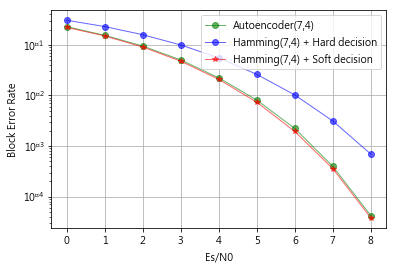

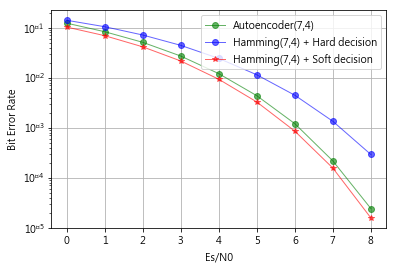

In [8]:
# plot 
plt.plot(Esdb , np.load('AE_BLER.npy') , 'go-', linewidth=1, alpha=0.6,label='Autoencoder(7,4)')
plt.plot(Esdb , l_BLER_hard , 'bo-', linewidth=1, alpha=0.6,label='Hamming(7,4) + Hard decision')
plt.plot(Esdb , l_BLER_soft , 'r*-', linewidth=1, alpha=0.6,label='Hamming(7,4) + Soft decision')
plt.yscale('log')
plt.xlabel('Es/N0')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
plt.show()


plt.plot(Esdb , np.load('AE_BER.npy') , 'go-', linewidth=1, alpha=0.6,label='Autoencoder(7,4)')
plt.plot(Esdb , l_BER_hard , 'bo-', linewidth=1, alpha=0.6,label='Hamming(7,4) + Hard decision')
plt.plot(Esdb , l_BER_soft , 'r*-', linewidth=1, alpha=0.6,label='Hamming(7,4) + Soft decision')
plt.yscale('log')
plt.xlabel('Es/N0')
plt.ylabel('Bit Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
plt.show()